# The California Wildfire Damage Prediction

# Introduction

Wildfires in California have become more frequent and severe, causing significant environmental and economic damage. This project aims to predict wildfire damage using machine learning by analyzing historical wildfire data, weather conditions, and geographical features.

# Description
The dataset reflects the damage sustained by structures across various fire incidents, categorized by damage percentage—ranging from minor damage (1-10%) to complete destruction (50-100%) and collected by field inspectors who evaluate structures impacted by wildland fires.

# Objective
The goal is to develop a Reggression classifier or suitable ML model  to predict wildfire damage in California using historical data, weather conditions, and geographical factors. By analyzing fire patterns, cleaning data, and building predictive models, this project aims to enhance early warning systems, improve resource allocation, and support risk assessment for wildfire managemen

**Dataset Columns Describtion**

DAMAGE: Indicates the level of fire damage to the structure (e.g., "No Damage", "Affected (1-9%)").

CITY: The city where the impacted structure is located.

STATE: The state abbreviation (e.g., "CA" for California).

CALFIREUNIT: The CAL FIRE unit responsible for the area.

COUNTY: The county where the impacted structure is located.

INCIDENTNAME: The name of the fire incident that impacted the structure.

APN: The Assessor’s Parcel Number (APN) of the property.

ASSESSEDIMPROVEDVALUE: The assessed value of the improved property (e.g., structures, not just land).

YEARBUILT: The year the structure was built.

SITEADDRESS: The full address of the property, including city, state, and ZIP code.

GLOBALID: A globally unique identifier for each record.

Latitude: The latitude coordinate of the structure’s location.

Longitude: The longitude coordinate of the structure’s location.

UTILITYMISCSTRUCTUREDISTANCE: The distance between the main structure and any utility or miscellaneous structures (if recorded).

FIRENAME: An alternative or secondary name for the fire incident.

geometry: A geospatial representation of the location in a point format (e.g., "POINT (-13585927.697 4646740.750)").

# Loading dataset

In [ ]:
# import packages and dataset loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/The California Wildfire Data_V.3.csv', encoding='ISO-8859-1')
df.head()

,Damage,City,CAL FIRE Unit,County,Incident Name,Incident Number (e.g. CAAEU 123456),Incident Start Date,If Affected 1-9% - Where did fire start?,If Affected 1-9% - What started fire?,Structure Defense Actions Taken,...,Vent Screen,Exterior Siding,Window Pane,Fence Attached to Structure,Year Built (parcel),Site Address (parcel),Latitude,Longitude,x,y
0,No Damage,Winters,LNU,Solano,Quail,CALNU 008419,06-06-2020,NaN,NaN,NaN,...,"Mesh Screen <= 1/8""""",Wood,Single Pane,No Fence,1997.0,8376 QUAIL CANYON RD VACAVILLE CA 95688,38.474960,-122.044465,-13585927.70,4646740.750
1,Affected (1-9%),Winters,LNU,Solano,Quail,CALNU 008419,06-06-2020 00:00,Deck on Grade,Unknown,Hand Crew Fuel Break,...,"Mesh Screen <= 1/8""""",Wood,Multi Pane,Combustible,1980.0,8402 QUAIL CANYON RD VACAVILLE CA 95688,38.477442,-122.043252,-13585792.71,4647093.599
2,No Damage,Winters,LNU,Solano,Quail,CALNU 008419,06-06-2020 00:00,NaN,NaN,NaN,...,"Mesh Screen > 1/8""""",Wood,Single Pane,No Fence,2004.0,8430 QUAIL CANYON RD VACAVILLE CA 95688,38.479357,-122.044585,-13585941.01,4647366.034
3,No Damage,Winters,LNU,Solano,Quail,CALNU 008419,06-06-2020 00:00,NaN,NaN,NaN,...,"Mesh Screen > 1/8""""",Wood,Single Pane,No Fence,1981.0,3838 PUTAH CREEK RD WINTERS CA 95694,38.487313,-122.015115,-13582660.52,4648497.399
4,No Damage,Winters,LNU,Solano,Quail,CALNU 008419,06-06-2020 00:00,NaN,NaN,NaN,...,"Mesh Screen > 1/8""""",Wood,Multi Pane,No Fence,1980.0,3830 PUTAH CREEK RD WINTERS CA 95694,38.485636,-122.016122,-13582772.60,4648258.826


# Exploratory Data Analysis (EDA)

In [ ]:
# Understanding the basic struction of the dataset
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100230 entries, 0 to 100229
Data columns (total 26 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Damage                                     100230 non-null  object 
 1   City                                       68616 non-null   object 
 2    CAL FIRE Unit                             100230 non-null  object 
 3   County                                     100200 non-null  object 
 4   Incident Name                              100230 non-null  object 
 5   Incident Number (e.g. CAAEU 123456)        100230 non-null  object 
 6   Incident Start Date                        100230 non-null  object 
 7   If Affected 1-9% - Where did fire start?   10740 non-null   object 
 8   If Affected 1-9% - What started fire?      9016 non-null    object 
 9   Structure Defense Actions Taken            24470 non-null   object 
 10  Structur

(100230, 26)

In [ ]:
# Basic statistical Measures
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Units in Structure (if multi unit),31184.0,4.332991e-01,34.608767,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.101000e+03
No of Damaged Outbuildings < 120 SQFT,31085.0,8.756635e-02,0.462729,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01
No of Non Damaged Outbuildings < 120 SQFT,31073.0,1.215203e-01,0.525580,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01
Year Built (parcel),69812.0,1.672284e+03,708.451814,0.000000e+00,1.944000e+03,1.972000e+03,1.987000e+03,2.022000e+03
Latitude,100230.0,3.832295e+01,2.019086,3.259255e+01,3.735093e+01,3.869296e+01,3.976387e+01,4.199119e+01
Longitude,100230.0,-1.211793e+02,1.538342,-1.237746e+02,-1.223162e+02,-1.216003e+02,-1.205093e+02,-1.164182e+02
x,100230.0,-1.348962e+07,171247.400027,-1.377852e+07,-1.361617e+07,-1.353648e+07,-1.341503e+07,-1.295961e+07
y,100230.0,4.629002e+06,282506.341772,3.841346e+06,4.488135e+06,4.677785e+06,4.831688e+06,5.159661e+06


In [ ]:
# Finding unique values
df.nunique()

,0
Damage,6
City,442
CAL FIRE Unit,27
County,50
Incident Name,270
Incident Number (e.g. CAAEU 123456),294
Incident Start Date,295
If Affected 1-9% - Where did fire start?,18
If Affected 1-9% - What started fire?,9
Structure Defense Actions Taken,10


In [ ]:
# checking missing values and duplicates
df.isnull().sum()
# missing values percentage and concatenate
missing = df.isnull().sum().sort_values(ascending=False)
percentage_of_missing = df.isnull().sum()/df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([missing, percentage_of_missing], axis=1, keys=['Missing_values', 'Percentage'])
missing_data

,Missing_values,Percentage
If Affected 1-9% - What started fire?,91214,0.910047
If Affected 1-9% - Where did fire start?,89490,0.892846
Structure Defense Actions Taken,75760,0.755862
No of Non Damaged Outbuildings < 120 SQFT,69157,0.689983
No of Damaged Outbuildings < 120 SQFT,69145,0.689863
Units in Structure (if multi unit),69046,0.688876
City,31614,0.315415
Year Built (parcel),30418,0.303482
Fence Attached to Structure,21595,0.215454
Site Address (parcel),4639,0.046284


In [ ]:
df.duplicated().sum()

103

In [ ]:
# Finding unique values categorical columns
df.select_dtypes(include=['object']).columns
categorical_columns = df.columns[df.nunique()<10]
for col in categorical_columns:
  print(col, df[col].unique())

Damage ['No Damage' 'Affected (1-9%)' 'Minor (10-25%)' 'Destroyed (>50%)'
 'Major (26-50%)' 'Inaccessible']
If Affected 1-9% - What started fire? [nan 'Unknown' 'Direct flame impingement' 'Embers' 'Radiant Heat'
 'Not Applicable' 'Bushes' 'Embers or overheated electrical motor'
 'Post on structure' '0-10']
Structure Category ['Single Residence' 'Other Minor Structure' 'Multiple Residence'
 'Nonresidential Commercial' 'Mixed Commercial/Residential'
 'Infrastructure' 'Agriculture']
Eaves ['Unenclosed' 'Enclosed' 'Unknown' 'No Eaves' ' ' 'Not Applicable' nan]
Window Pane ['Single Pane' 'Multi Pane' 'Unknown' 'No Windows' ' ' nan 'No Deck/Porch'
 'Radiant Heat']
Fence Attached to Structure ['No Fence' 'Combustible' 'Unknown' 'Non Combustible' nan]


In [ ]:
# Finding Numerical Columns
df.select_dtypes(include=['int64', 'float64']).columns

Index(['Units in Structure (if multi unit)',
       'No of Damaged Outbuildings < 120 SQFT',
       'No of Non Damaged Outbuildings < 120 SQFT', 'Year Built (parcel)',
       'Latitude', 'Longitude', 'x', 'y'],
      dtype='object')

# My Observation

Based on my Obervaiton,

the dataset has duplicate and  missing values in both categorical and numerical columns.

**Duplicates:** 103 duplicated records needs to be removed.

**Missing Values:** Present in both numerical and categorical column, so we need encode the values inorder to perform machine learning models.

**Target Variable:** as per the objective to predict the Damages happened from Wildfire, i am setting 'Damage' column as Target variable.

**Unnecessary Features:** There are lot of features which are inapropriate for Machine learning modeling, so we need to take action to remove.


# EDA Visualization

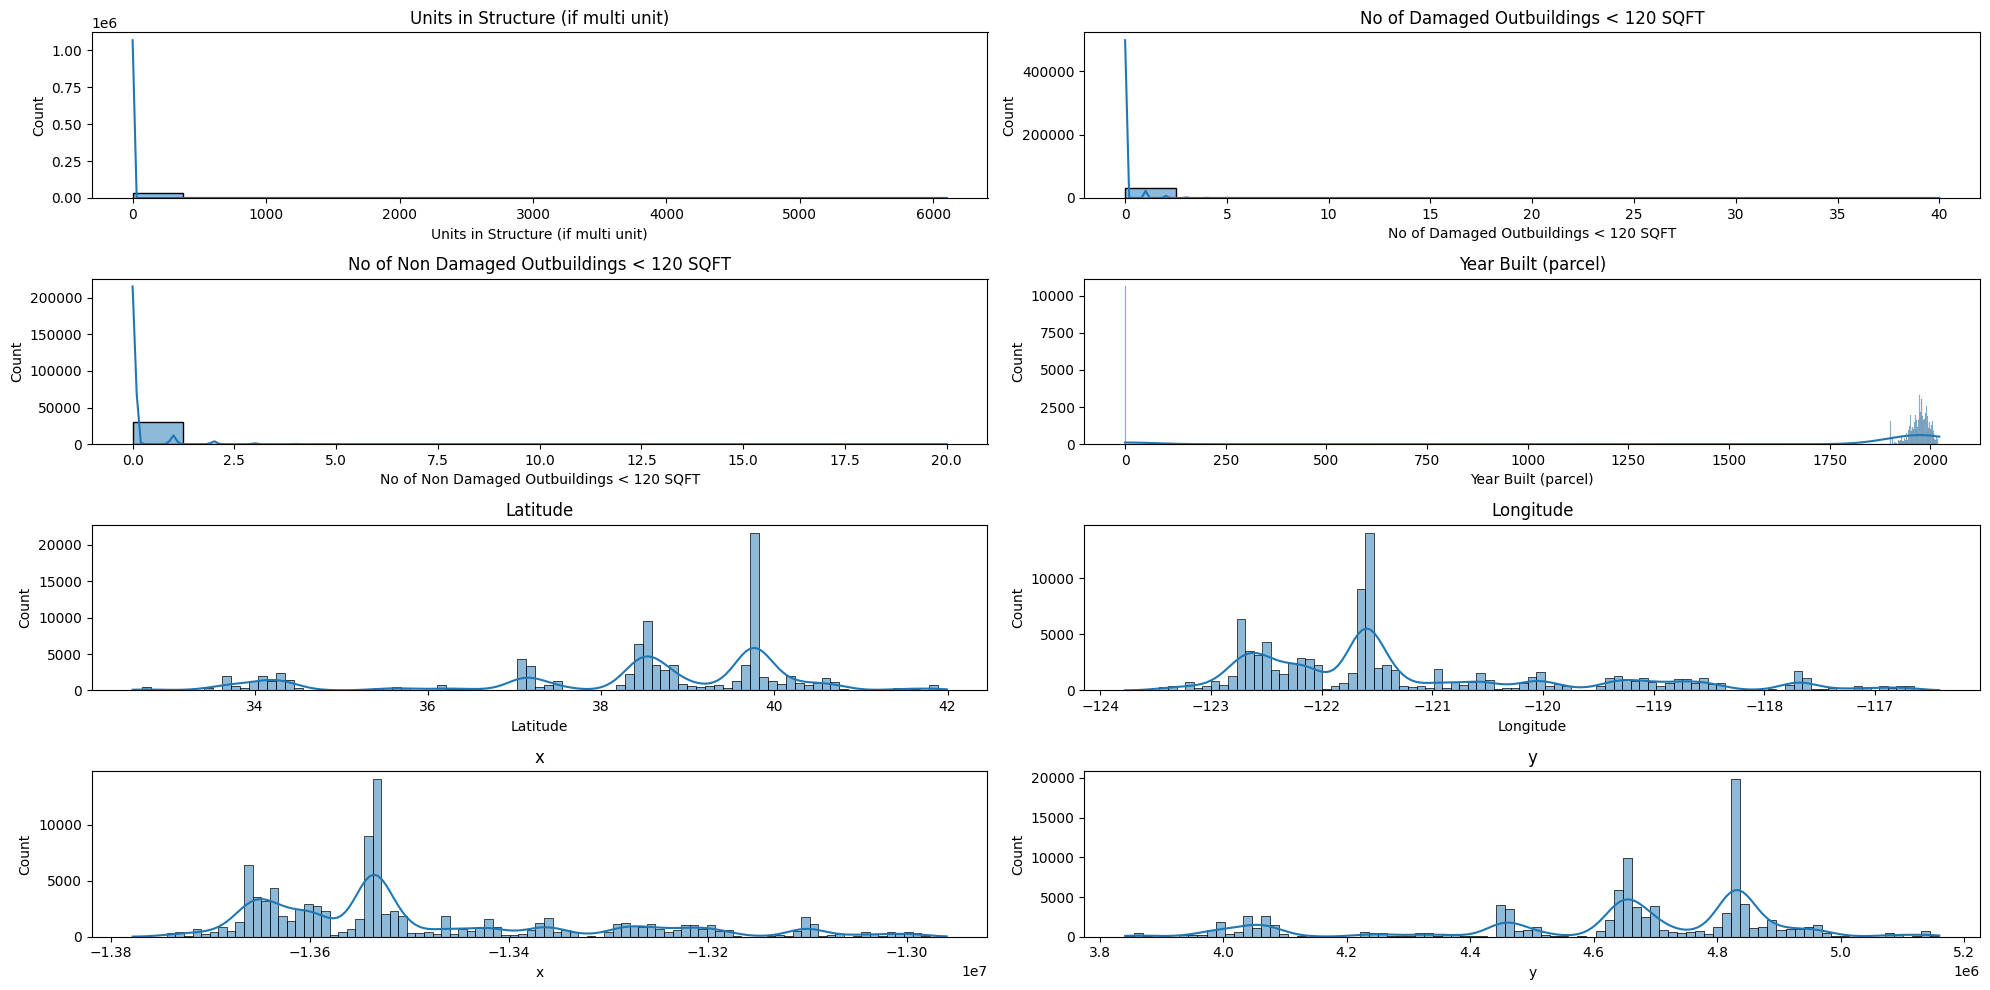

In [ ]:
# Analysing numerical columns with discribtive statistics
fig, axes = plt.subplots(4, 2, figsize=(20, 10))
axes = axes.flatten()
for i, column in enumerate(df.select_dtypes(include=['int64', 'float64']).columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(column)
plt.tight_layout()
plt.show()


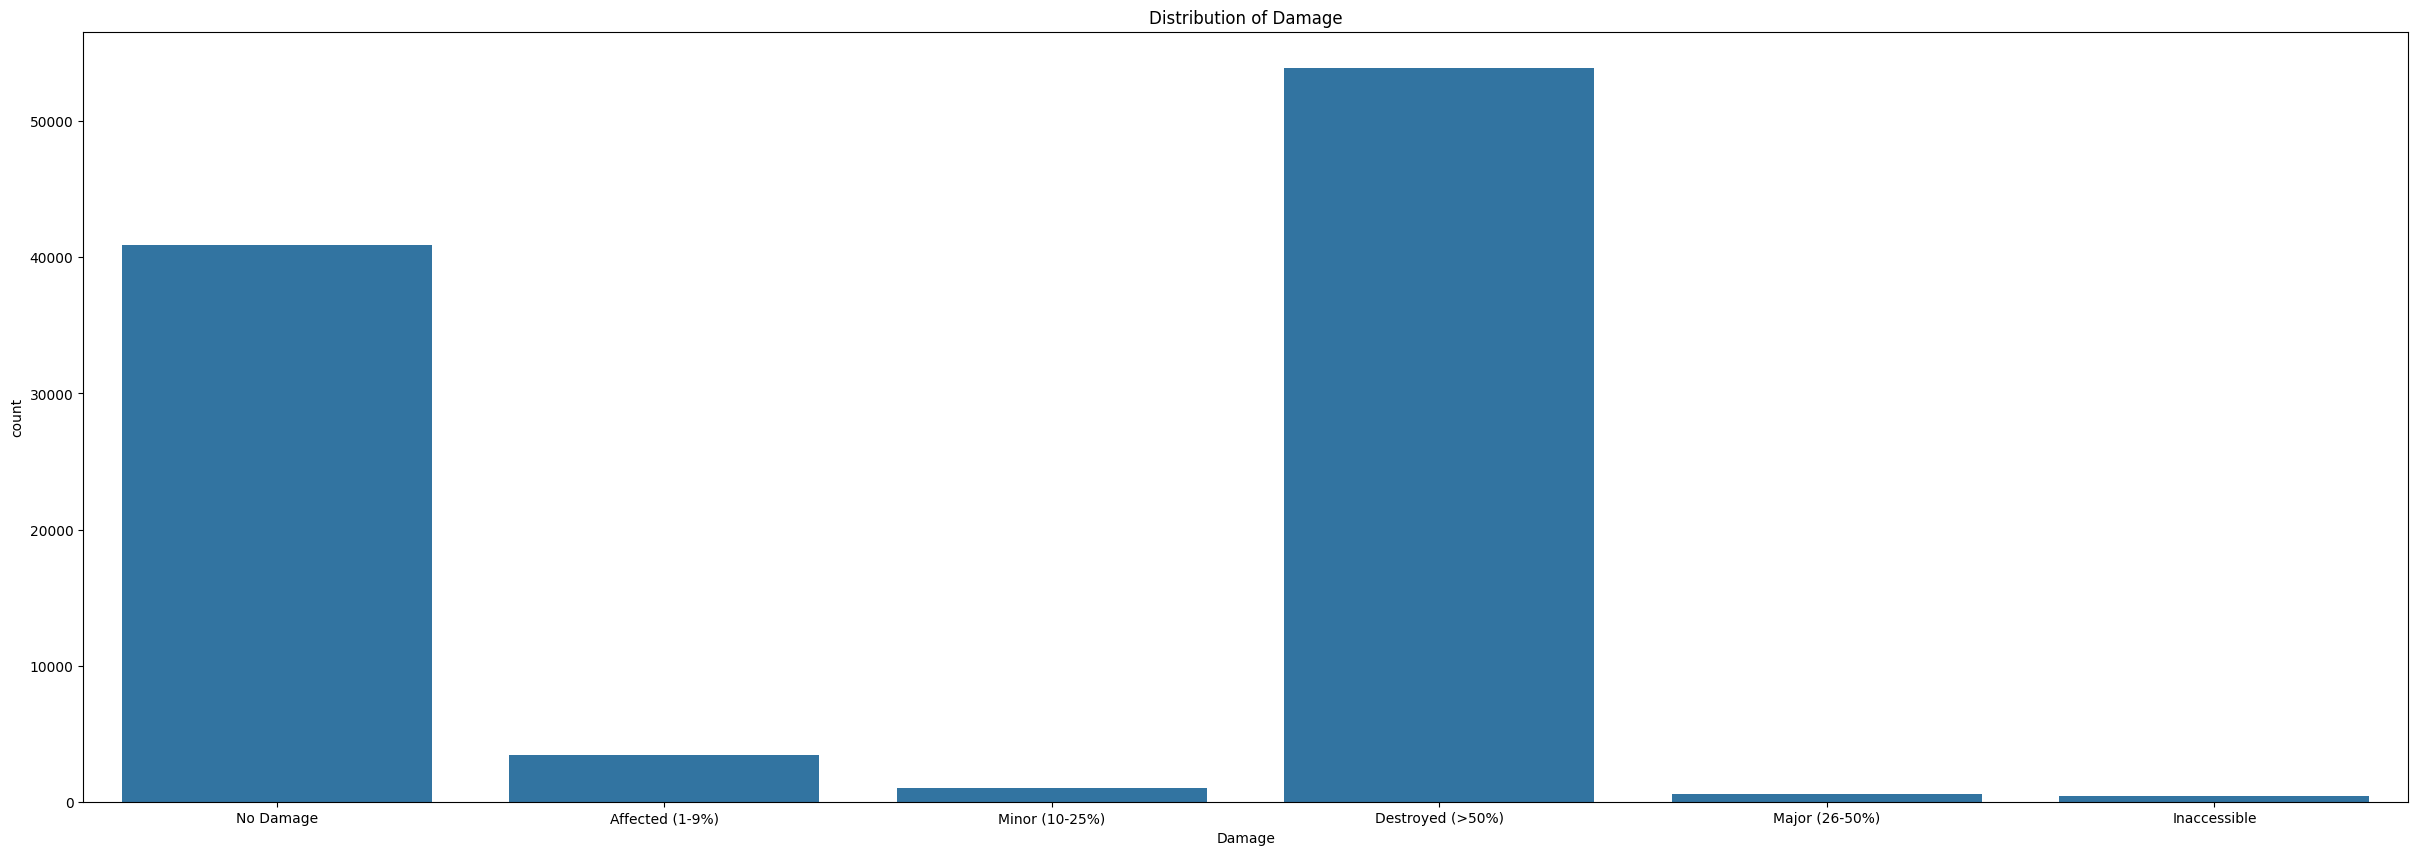

In [ ]:
# Distribution of Damage
plt.figure(figsize=(30, 10))
sns.countplot(data=df, x='Damage')
plt.title('Distribution of Damage')
plt.show()


## Univariate Visualization

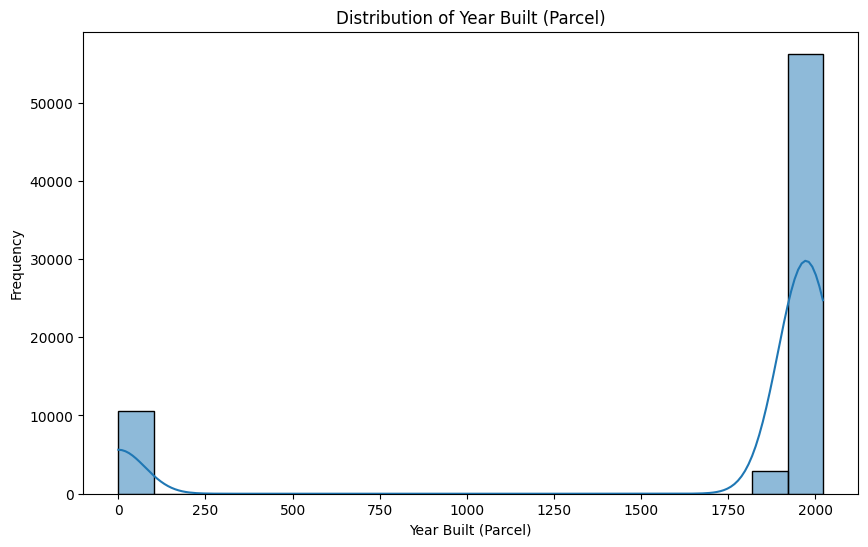

In [ ]:
# Univariate Analysis of Year Built (Parcel) column
plt.figure(figsize=(10, 6))
sns.histplot(df['Year Built (parcel)'], bins=20, kde=True)
plt.title('Distribution of Year Built (Parcel)')
plt.xlabel('Year Built (Parcel)')
plt.ylabel('Frequency')
plt.show()

**Observation**

The distribution of the "Year Built (parcel)" variable shows that a large number of structures were built between 1900 and 2000.

If older buildings are more vulnerable to wildfires, regions with a high density of such structures may require more fire safety measures.

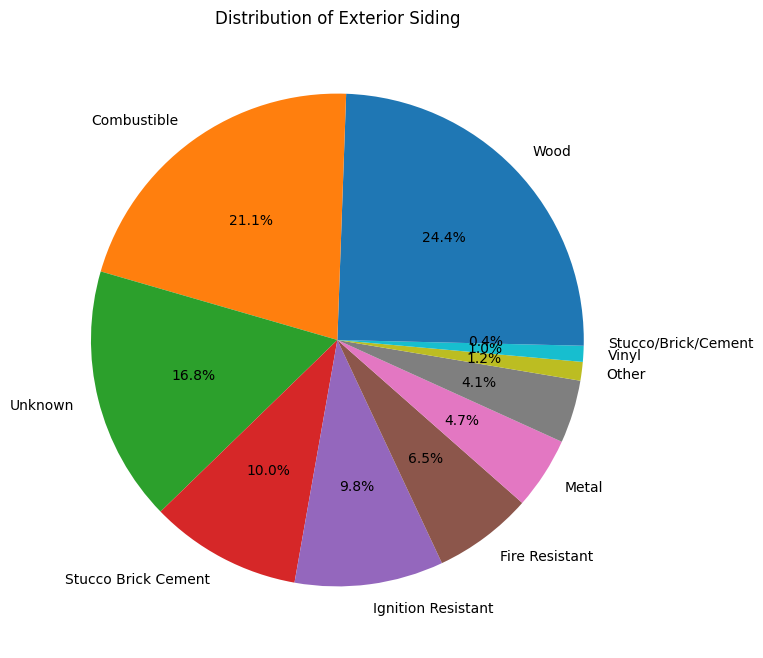

In [ ]:
# Distribution of Exterior Siding through pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['Exterior Siding'].value_counts(), labels=df['Exterior Siding'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Exterior Siding')
plt.show()

**Observation**

A large portion of buildings use combustible materials (Wood, Combustible), increasing wildfire risks.

Fire-resistant materials make up a smaller share, suggesting a need for more fireproof construction practices.

## Bivariate Visualization

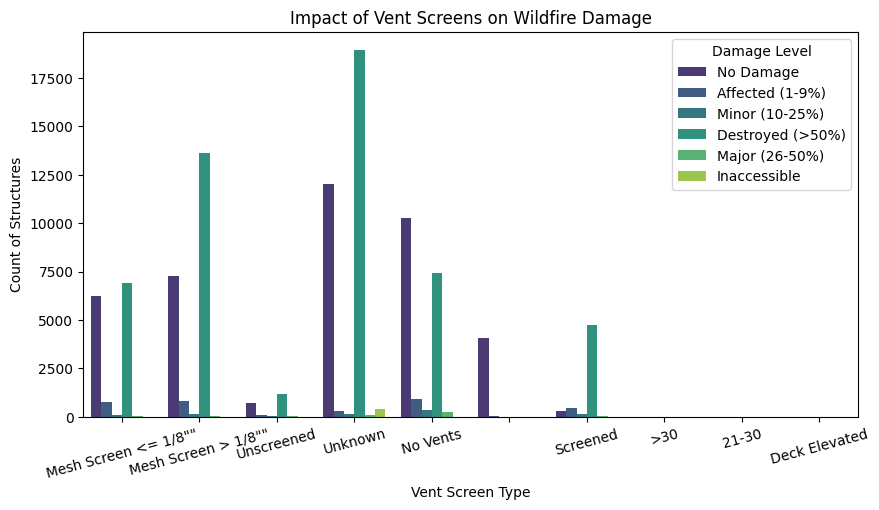

In [ ]:
# Bivariate Analysis: Vent Screen vs. Damage Levels
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x=" Vent Screen", hue="Damage", palette="viridis")
plt.title("Impact of Vent Screens on Wildfire Damage")
plt.xlabel("Vent Screen Type")
plt.ylabel("Count of Structures")
plt.xticks(rotation=15)
plt.legend(title="Damage Level")
plt.show()

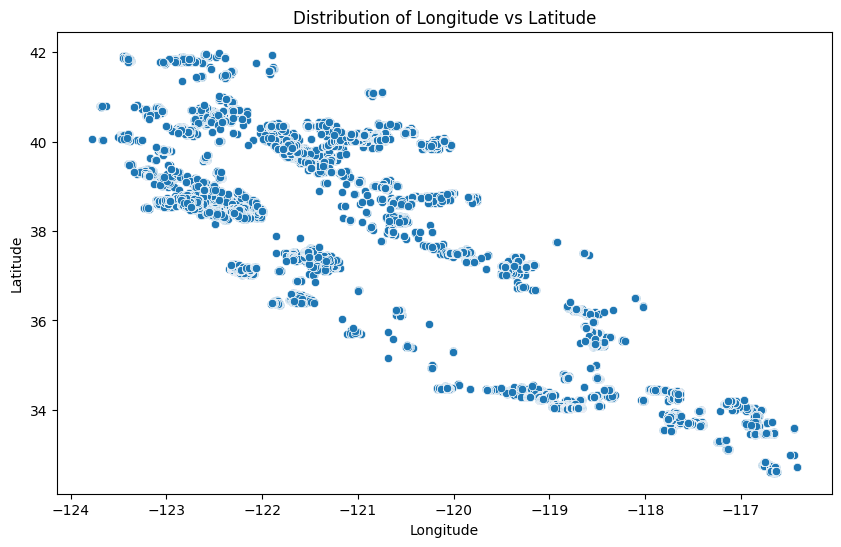

In [ ]:
# Distribution of Longitude vs Latitude
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Longitude', y='Latitude')
plt.title('Distribution of Longitude vs Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Multivariate Visualization

Text(0, 0.5, 'Latitude')

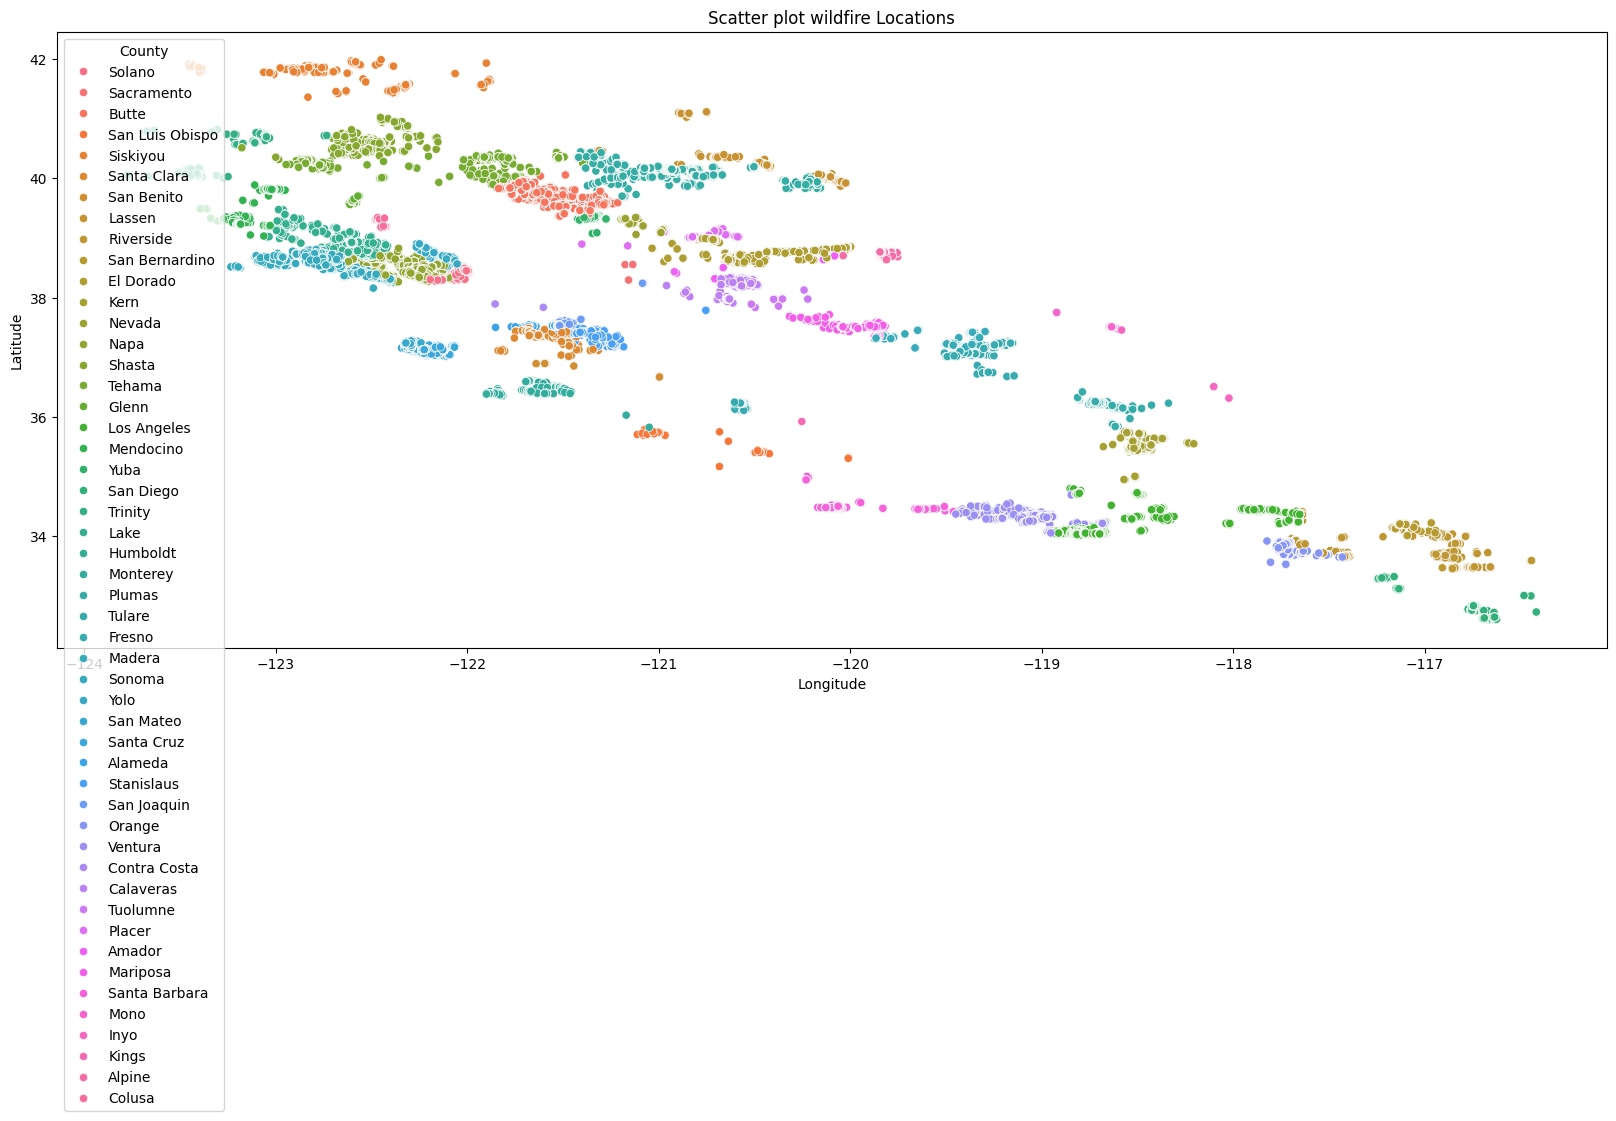

In [ ]:
# Distribution of Latitude vs Longitude with Region
plt.figure(figsize=(20, 8))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='County')
plt.title('Scatter plot wildfire Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

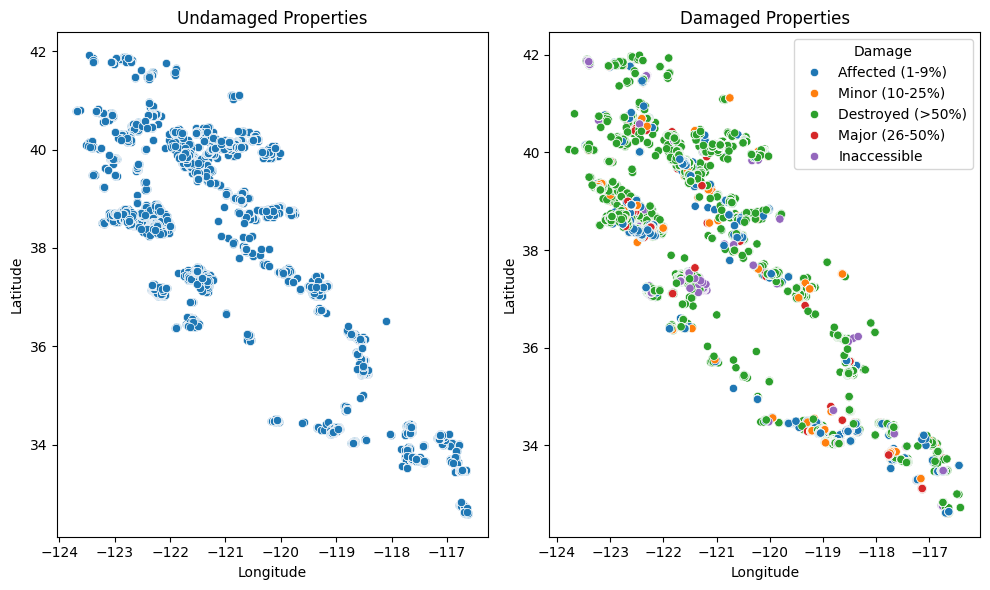

In [ ]:
# Undamaged properties
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df[df['Damage'] == 'No Damage'], x='Longitude', y='Latitude' )
plt.title('Undamaged Properties')

# Damaged properties ('Affected (1-9%)' 'Minor (10-25%)' 'Destroyed (>50%)''Major (26-50%)' 'Inaccessible') each different colors
plt.subplot(1, 2, 2)
sns.scatterplot(data=df[df['Damage'] != 'No Damage'], x='Longitude', y='Latitude', hue='Damage')
plt.title('Damaged Properties')

plt.tight_layout()
plt.show()

custom_palette = {
    'Affected (1-9%)': 'yellow',
    'Minor (10-25%)': 'orange',
    'Major (26-50%)': 'red',
    'Destroyed (>50%)': 'black',
    'Inaccessible': 'purple'
}


In [ ]:
print(df['Damage'].unique())

['No Damage' 'Affected (1-9%)' 'Minor (10-25%)' 'Destroyed (>50%)'
 'Major (26-50%)' 'Inaccessible']


Text(0, 0.5, 'Count')

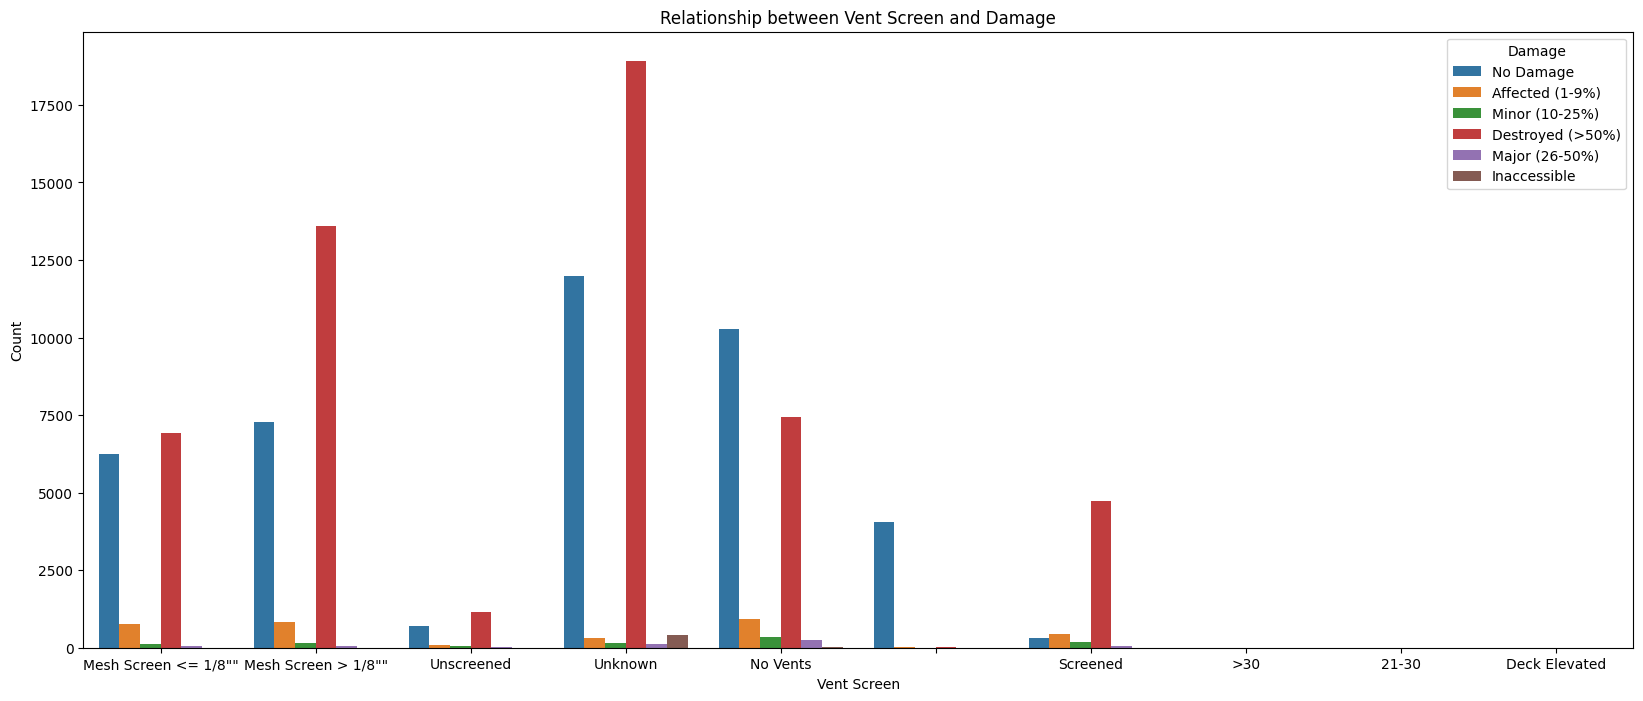

In [ ]:
# Relationship between vent screen, exterior siding and damage
plt.figure(figsize=(20, 8))
sns.countplot(data=df, x=' Vent Screen', hue='Damage')
plt.title('Relationship between Vent Screen and Damage')
plt.xlabel('Vent Screen')
plt.ylabel('Count')

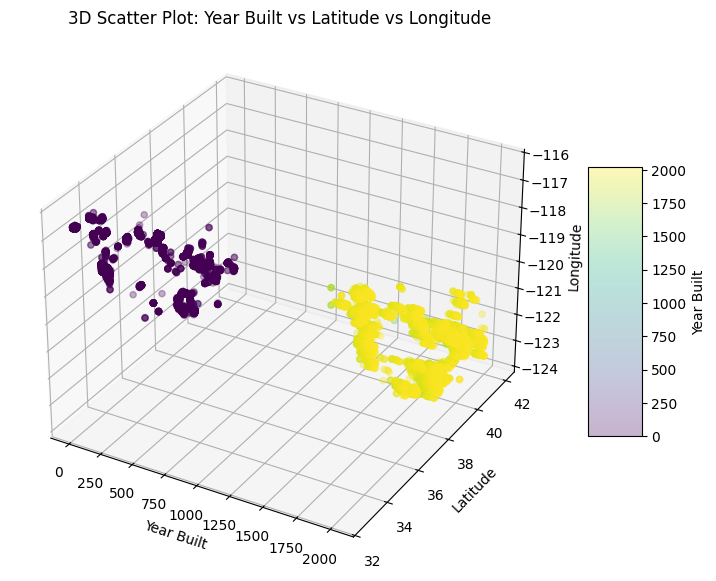

In [ ]:
# Multivariate Analysis of [Year Built, Longitude and Latitude]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df["Year Built (parcel)"], df["Latitude"], df["Longitude"], alpha=0.3, c=df["Year Built (parcel)"], cmap='viridis')

ax.set_xlabel("Year Built")
ax.set_ylabel("Latitude")
ax.set_zlabel("Longitude")
ax.set_title("3D Scatter Plot: Year Built vs Latitude vs Longitude")

plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=5, label="Year Built")
plt.show()

**Observation**

The color gradient represents the "Year Built" variable.
The darker colors (older buildings) are concentrated in certain areas, while newer buildings (lighter colors) appear in different zones.
This indicates that urban expansion over time has been concentrated in specific locations rather than evenly spread.

Further investigation is needed to see if certain locations (specific latitudes & longitudes) experience more wildfires.

Urban planning should prioritize fire-resistant construction materials, especially in areas with a high density of older buildings.

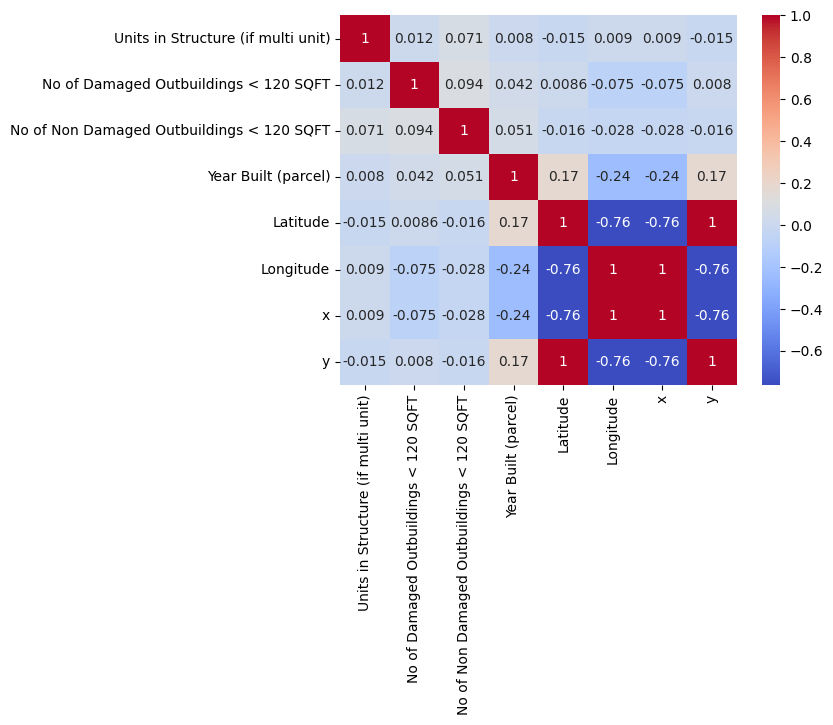

In [ ]:
# Correlation between Numerical columns
sns.heatmap(df[df.select_dtypes(include=['number']).columns].corr(), annot=True, cmap='coolwarm')
plt.show()

**Correlation**

Strong Correlations:

Latitude vs. Longitude (-0.76)
Strong negative correlation between latitude and longitude, likely due to geographic coordinates following a specific pattern in the California region.

Longitude vs. X and Y (1.0 and -0.76)
Longitude and the X coordinate have a perfect correlation (1.0), meaning they are the same or derived from each other.
Similarly, the Y coordinate has a -0.76 correlation with longitude, meaning they move in opposite directions.

Latitude vs. Y (1.0)
Latitude and Y have a perfect positive correlation (1.0), indicating they are the same feature in different formats.


#Data Preprocessing

In [ ]:
# Duplicate the dataset
df2 = df.copy()
df2.describe()

,Units in Structure (if multi unit),No of Damaged Outbuildings < 120 SQFT,No of Non Damaged Outbuildings < 120 SQFT,Year Built (parcel),Latitude,Longitude,x,y
count,31184.000000,31085.000000,31073.00000,69812.000000,100230.000000,100230.000000,1.002300e+05,1.002300e+05
mean,0.433299,0.087566,0.12152,1672.283862,38.322953,-121.179297,-1.348962e+07,4.629002e+06
std,34.608767,0.462729,0.52558,708.451814,2.019086,1.538342,1.712474e+05,2.825063e+05
min,0.000000,0.000000,0.00000,0.000000,32.592548,-123.774580,-1.377852e+07,3.841346e+06
25%,0.000000,0.000000,0.00000,1944.000000,37.350926,-122.316162,-1.361617e+07,4.488135e+06
50%,0.000000,0.000000,0.00000,1972.000000,38.692955,-121.600277,-1.353648e+07,4.677785e+06
75%,0.000000,0.000000,0.00000,1987.000000,39.763874,-120.509278,-1.341503e+07,4.831688e+06
max,6101.000000,40.000000,20.00000,2022.000000,41.991195,-116.418163,-1.295961e+07,5.159661e+06


In [ ]:
# identifying categorical and numerical columns
categorical_columns = df2.select_dtypes(include=['object']).columns
numerical_columns = df2.select_dtypes(include=['int64', 'float64']).columns
print("Categorical Columns:",categorical_columns)
print("Numerical Columns:",numerical_columns)

Categorical Columns: Index(['Damage', 'City', ' CAL FIRE Unit', 'County', 'Incident Name',
       'Incident Number (e.g. CAAEU 123456)', 'Incident Start Date',
       'If Affected 1-9% - Where did fire start?',
       'If Affected 1-9% - What started fire?',
       'Structure Defense Actions Taken', 'Structure Category',
       'Roof Construction', 'Eaves', ' Vent Screen', 'Exterior Siding',
       'Window Pane', 'Fence Attached to Structure', 'Site Address (parcel)'],
      dtype='object')
Numerical Columns: Index(['Units in Structure (if multi unit)',
       'No of Damaged Outbuildings < 120 SQFT',
       'No of Non Damaged Outbuildings < 120 SQFT', 'Year Built (parcel)',
       'Latitude', 'Longitude', 'x', 'y'],
      dtype='object')


In [ ]:
# Remove duplicates
df2.drop_duplicates(inplace=True)
df2.duplicated().sum()

0

In [ ]:
print(missing_data.sort_values(by='Percentage', ascending=False))

                                           Missing_values  Percentage
If Affected 1-9% - What started fire?               91214    0.910047
If Affected 1-9% - Where did fire start?            89490    0.892846
Structure Defense Actions Taken                     75760    0.755862
No of Non Damaged Outbuildings < 120 SQFT           69157    0.689983
No of Damaged Outbuildings < 120 SQFT               69145    0.689863
Units in Structure (if multi unit)                  69046    0.688876
City                                                31614    0.315415
Year Built (parcel)                                 30418    0.303482
Fence Attached to Structure                         21595    0.215454
Site Address (parcel)                                4639    0.046284
 Vent Screen                                         1198    0.011953
Eaves                                                1112    0.011094
Window Pane                                           976    0.009738
Exterior Siding     

In [ ]:
#drop['If Affected 1-9% - What started fire?', 'If Affected 1-9% - Where did fire start?','Structure Defense Actions Taken', 'No of Non Damaged Outbuildings < 120 SQFT','No of Damaged Outbuildings < 120 SQFT', 'Units in Structure (if multi unit)', axis =1 ]df2.drop['If Affected 1-9% - What started fire?', 'If Affected 1-9% - Where did fire start?','Structure Defense Actions Taken', 'No of Non Damaged Outbuildings < 120 SQFT','No of Damaged Outbuildings < 120 SQFT', 'Units in Structure (if multi unit)', axis =1 ]
df2 = df2.drop(['If Affected 1-9% - What started fire?',
                'If Affected 1-9% - Where did fire start?',
                'Structure Defense Actions Taken',
                'No of Non Damaged Outbuildings < 120 SQFT',
                'No of Damaged Outbuildings < 120 SQFT',
                'Units in Structure (if multi unit)'], axis=1)

In [ ]:
# Handling missing values
df2.isnull().sum()

,0
Damage,0
City,31610
CAL FIRE Unit,0
County,30
Incident Name,0
Incident Number (e.g. CAAEU 123456),0
Incident Start Date,0
Structure Category,0
Roof Construction,535
Eaves,1019


## Handling Missing Values

In [ ]:
# Handling Missing values on Numerical columns with KNN Impputation
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors= 20)
df2[df2.select_dtypes(include=['number']).columns]= imputer.fit_transform(df2[df2.select_dtypes(include=['number']).columns])
df2.isnull().sum()

,0
Damage,0
City,31610
CAL FIRE Unit,0
County,30
Incident Name,0
Incident Number (e.g. CAAEU 123456),0
Incident Start Date,0
Structure Category,0
Roof Construction,535
Eaves,1019


In [ ]:
df2.select_dtypes(include=['object']).columns
categorical_columns = df2.columns[df2.nunique()<10]
for col in categorical_columns:
  print(col, df2[col].unique())

Damage ['No Damage' 'Affected (1-9%)' 'Minor (10-25%)' 'Destroyed (>50%)'
 'Major (26-50%)' 'Inaccessible']
Structure Category ['Single Residence' 'Other Minor Structure' 'Multiple Residence'
 'Nonresidential Commercial' 'Mixed Commercial/Residential'
 'Infrastructure' 'Agriculture']
Eaves ['Unenclosed' 'Enclosed' 'Unknown' 'No Eaves' ' ' 'Not Applicable' nan]
Window Pane ['Single Pane' 'Multi Pane' 'Unknown' 'No Windows' ' ' nan 'No Deck/Porch'
 'Radiant Heat']
Fence Attached to Structure ['No Fence' 'Combustible' 'Unknown' 'Non Combustible' nan]


In [ ]:
# Mode imputation for all the categorical columns
df2[df2.select_dtypes(include=['object']).columns] = df2[df2.select_dtypes(include=['object']).columns].fillna(df2[df2.select_dtypes(include=['object']).columns].mode().iloc[0])
df2.isnull().sum()

,0
Damage,0
City,0
CAL FIRE Unit,0
County,0
Incident Name,0
Incident Number (e.g. CAAEU 123456),0
Incident Start Date,0
Structure Category,0
Roof Construction,0
Eaves,0


In [ ]:
df2.select_dtypes(include=['object']).columns
categorical_columns = df2.columns[df2.nunique()<10]
for col in categorical_columns:
  print(col, df2[col].unique())

Damage ['No Damage' 'Affected (1-9%)' 'Minor (10-25%)' 'Destroyed (>50%)'
 'Major (26-50%)' 'Inaccessible']
Structure Category ['Single Residence' 'Other Minor Structure' 'Multiple Residence'
 'Nonresidential Commercial' 'Mixed Commercial/Residential'
 'Infrastructure' 'Agriculture']
Eaves ['Unenclosed' 'Enclosed' 'Unknown' 'No Eaves' ' ' 'Not Applicable']
Window Pane ['Single Pane' 'Multi Pane' 'Unknown' 'No Windows' ' ' 'No Deck/Porch'
 'Radiant Heat']
Fence Attached to Structure ['No Fence' 'Combustible' 'Unknown' 'Non Combustible']


In [ ]:
# Replace blanck with Unknown
df2 = df2.replace(' ', 'Unknown')
df2.isnull().sum()

,0
Damage,0
City,0
CAL FIRE Unit,0
County,0
Incident Name,0
Incident Number (e.g. CAAEU 123456),0
Incident Start Date,0
Structure Category,0
Roof Construction,0
Eaves,0


In [ ]:
df2.select_dtypes(include=['object']).columns
categorical_columns = df2.columns[df2.nunique()<10]
for col in categorical_columns:
  print(col, df2[col].unique())

Damage ['No Damage' 'Affected (1-9%)' 'Minor (10-25%)' 'Destroyed (>50%)'
 'Major (26-50%)' 'Inaccessible']
Structure Category ['Single Residence' 'Other Minor Structure' 'Multiple Residence'
 'Nonresidential Commercial' 'Mixed Commercial/Residential'
 'Infrastructure' 'Agriculture']
Eaves ['Unenclosed' 'Enclosed' 'Unknown' 'No Eaves' 'Not Applicable']
 Vent Screen ['Mesh Screen <= 1/8""' 'Mesh Screen > 1/8""' 'Unscreened' 'Unknown'
 'No Vents' 'Screened' '>30' '21-30' 'Deck Elevated']
Window Pane ['Single Pane' 'Multi Pane' 'Unknown' 'No Windows' 'No Deck/Porch'
 'Radiant Heat']
Fence Attached to Structure ['No Fence' 'Combustible' 'Unknown' 'Non Combustible']


In [ ]:
# Re imputing categorical columns with mode
df2[df2.select_dtypes(include=['object']).columns] = df2[df2.select_dtypes(include=['object']).columns].fillna(df2[df2.select_dtypes(include=['object']).columns].mode().iloc[0])
df2.isnull().sum()

,0
Damage,0
City,0
CAL FIRE Unit,0
County,0
Incident Name,0
Incident Number (e.g. CAAEU 123456),0
Incident Start Date,0
Structure Category,0
Roof Construction,0
Eaves,0


In [ ]:
df2.select_dtypes(include=['object']).columns
categorical_columns = df2.columns[df2.nunique()<10]
for col in categorical_columns:
  print(col, df2[col].unique())

Damage ['No Damage' 'Affected (1-9%)' 'Minor (10-25%)' 'Destroyed (>50%)'
 'Major (26-50%)' 'Inaccessible']
Structure Category ['Single Residence' 'Other Minor Structure' 'Multiple Residence'
 'Nonresidential Commercial' 'Mixed Commercial/Residential'
 'Infrastructure' 'Agriculture']
Eaves ['Unenclosed' 'Enclosed' 'Unknown' 'No Eaves' 'Not Applicable']
 Vent Screen ['Mesh Screen <= 1/8""' 'Mesh Screen > 1/8""' 'Unscreened' 'Unknown'
 'No Vents' 'Screened' '>30' '21-30' 'Deck Elevated']
Window Pane ['Single Pane' 'Multi Pane' 'Unknown' 'No Windows' 'No Deck/Porch'
 'Radiant Heat']
Fence Attached to Structure ['No Fence' 'Combustible' 'Unknown' 'Non Combustible']


## Handling Outliers

In [ ]:
# Boxplot for finding outliers
Numerial_columns = df2.select_dtypes(include=['int64', 'float64']).columns
Categorical_columns = df2.select_dtypes(include=['object']).columns
print(Numerial_columns)
print(Categorical_columns)

Index(['Year Built (parcel)', 'Latitude', 'Longitude', 'x', 'y'], dtype='object')
Index(['Damage', 'City', ' CAL FIRE Unit', 'County', 'Incident Name',
       'Incident Number (e.g. CAAEU 123456)', 'Incident Start Date',
       'Structure Category', 'Roof Construction', 'Eaves', ' Vent Screen',
       'Exterior Siding', 'Window Pane', 'Fence Attached to Structure',
       'Site Address (parcel)'],
      dtype='object')


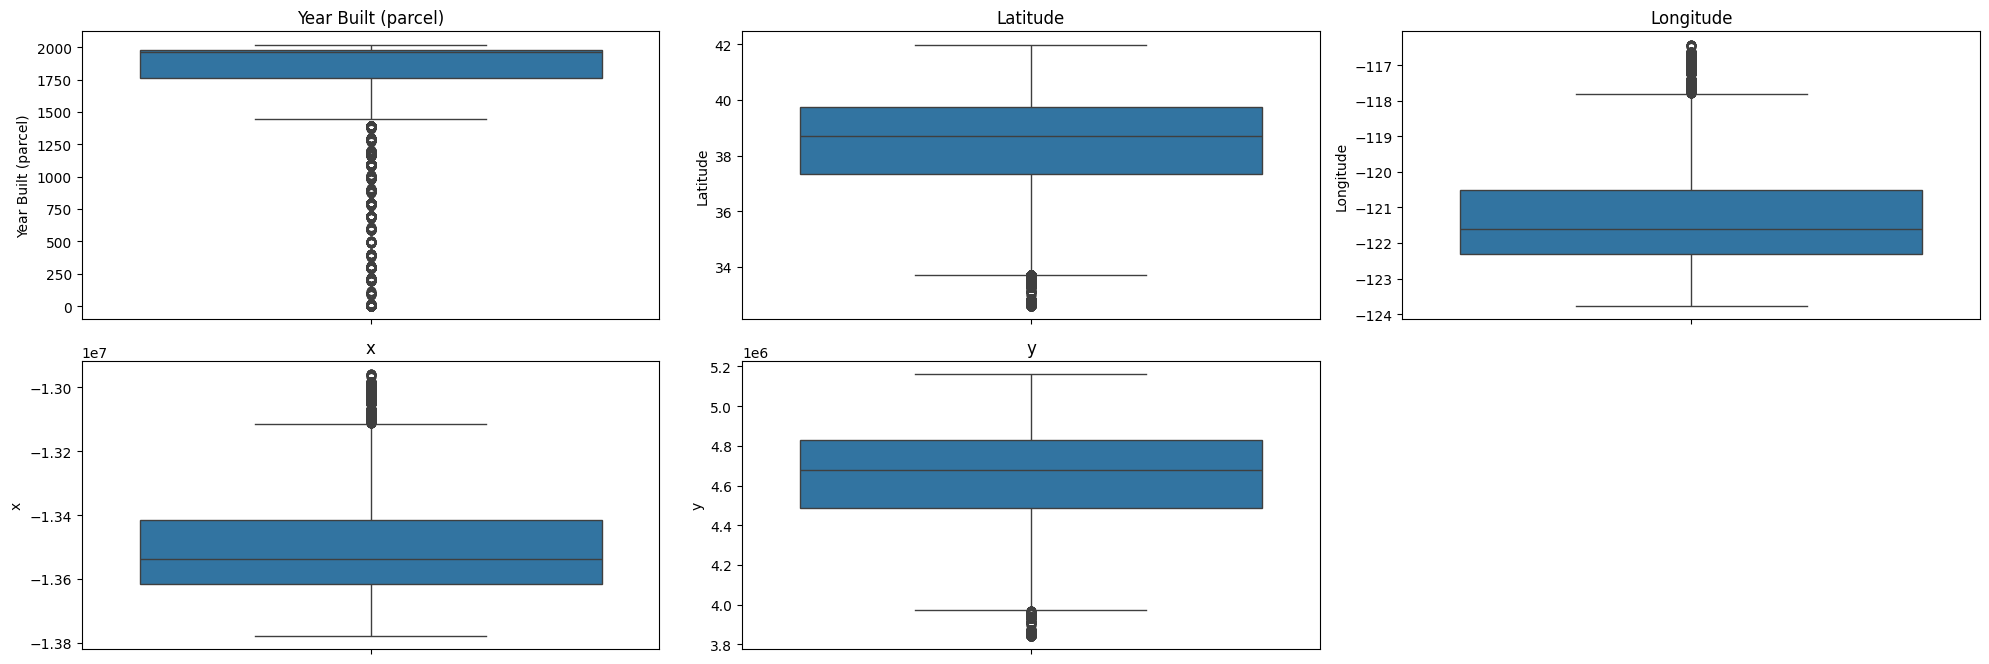

In [ ]:
plt.figure(figsize=(20,10))
for i, col in enumerate(Numerial_columns):
  plt.subplot(3,3,i+1)
  sns.boxplot(df2[col])
  plt.title(col)
plt.tight_layout()


Based on the above boxplot we can see that the Higher outlier present in each 'Year Built (parcel)'columns. Inorder to investigate further we can check and remove Outliers with IQR

In [ ]:
# Checking Outliers with IQR - Inter Quartile Range
Q1 = df2['Year Built (parcel)'].quantile(0.25)
Q3 = df2['Year Built (parcel)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)

1441.6875 2306.1875


In [ ]:
Q1 = df2['Latitude'].quantile(0.25)
Q3 = df2['Latitude'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)

33.727623085000005 43.38539528499999


In [ ]:
# summary statistics
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year Built (parcel),100127.0,1.602755e+03,695.682936,0.000000e+00,1.765875e+03,1.963000e+03,1.982000e+03,2.022000e+03
Latitude,100127.0,3.832168e+01,2.018579,3.259255e+01,3.734929e+01,3.869244e+01,3.976373e+01,4.199119e+01
Longitude,100127.0,-1.211786e+02,1.537890,-1.237746e+02,-1.223148e+02,-1.216002e+02,-1.205086e+02,-1.164182e+02
x,100127.0,-1.348954e+07,171197.075873,-1.377852e+07,-1.361602e+07,-1.353647e+07,-1.341496e+07,-1.295961e+07
y,100127.0,4.628819e+06,282432.272041,3.841346e+06,4.487905e+06,4.677711e+06,4.831667e+06,5.159661e+06


In [ ]:
# Remove outliers on Year Built column
df2_Outlier = df2[(df2['Year Built (parcel)'] >= 1900) & (df2['Year Built (parcel)'] <= 2023)]
print(df2_Outlier.shape)

(69413, 20)


As per result only Year Built (parcel) columns contains higher Outliers and i have removed the same.

## Handling Skewness

In [ ]:
# Finding skewness
df3 = df2_Outlier.copy()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69413 entries, 0 to 100229
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Damage                               69413 non-null  object 
 1   City                                 69413 non-null  object 
 2    CAL FIRE Unit                       69413 non-null  object 
 3   County                               69413 non-null  object 
 4   Incident Name                        69413 non-null  object 
 5   Incident Number (e.g. CAAEU 123456)  69413 non-null  object 
 6   Incident Start Date                  69413 non-null  object 
 7   Structure Category                   69413 non-null  object 
 8   Roof Construction                    69413 non-null  object 
 9   Eaves                                69413 non-null  object 
 10   Vent Screen                         69413 non-null  object 
 11  Exterior Siding                 

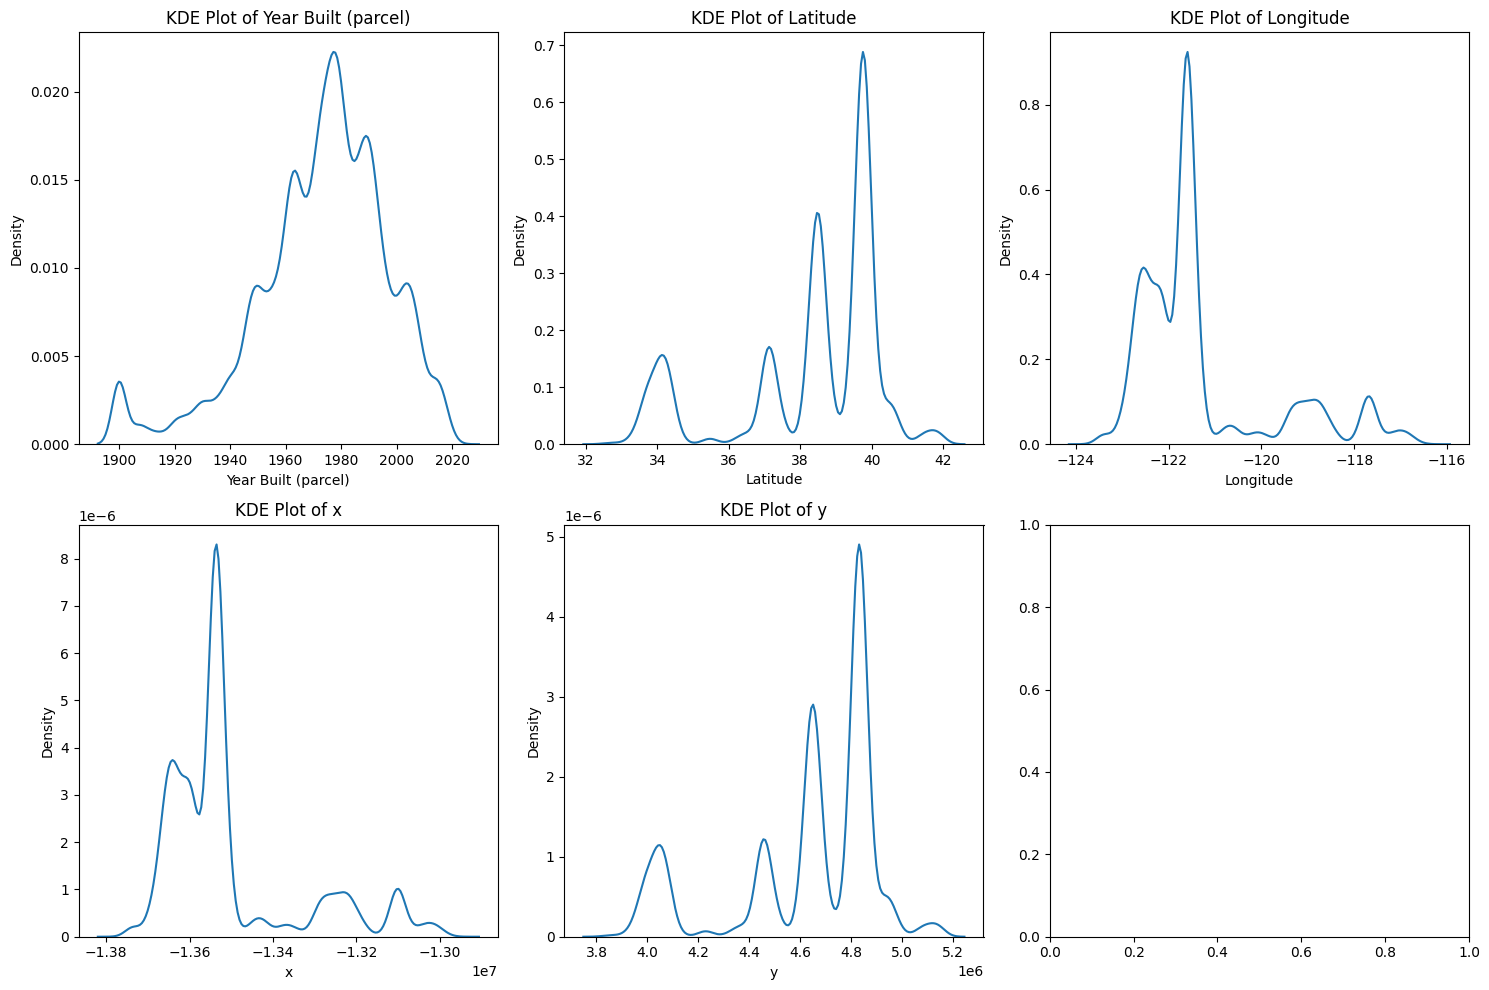

In [ ]:
# Finding skewness in Numerical columns by KD plot
from sklearn.neighbors import KernelDensity
figure, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
for i, column in enumerate(df3.select_dtypes(include=['int64', 'float64']).columns):
    sns.kdeplot(df3[column], ax=axes[i])
    axes[i].set_title(f'KDE Plot of {column}')
plt.tight_layout()
plt.show()

As per the above KDplot, it represent there are skewness in each columns. we need to rectify it by using either log or square-root transformation


In [ ]:
# Calculating skewness score
skewness_column = ['Year Built (parcel)', 'Latitude', 'Longitude','x', 'y']
skewness = df3[skewness_column].skew()
skewness

,0
Year Built (parcel),-0.819962
Latitude,-1.133412
Longitude,1.435133
x,1.435133
y,-1.093463


In [ ]:
# Log Transformation
df3['Year Built (parcel)'] = np.log1p(df3['Year Built (parcel)'])
print(f"{df3['Year Built (parcel)'].skew()}")

-0.8616492591996241


**Observation**

As per the above result, both Log and Square-root Transformation is not provided great result. This is because of the lack of data (unkown data, zero values). When we think practically the skewness or the missing data are in early 1900. so by that time there no buildings or construction works there is no need for  measurement happended before 1950's. Hence proceed with the original columns.

# Feature Engineering

In [ ]:
# Fixing Target variable
df3['Damage'] = df3['Damage'].replace(['No Damage'], 'No Damage')
df3['Damage'] = df3['Damage'].replace(['Inaccessible'], 'No Damage')
df3['Damage'] = df3['Damage'].replace(['Affected (1-9%)'], 'Damaged')
df3['Damage'] = df3['Damage'].replace(['Minor (10-25%)'], 'Damaged')
df3['Damage'] = df3['Damage'].replace(['Major (26-50%)'], 'Damaged')
df3['Damage'] = df3['Damage'].replace(['Destroyed (>50%)'], 'Damaged')


In [ ]:
df3['Damage'].unique()

array(['No Damage', 'Damaged'], dtype=object)

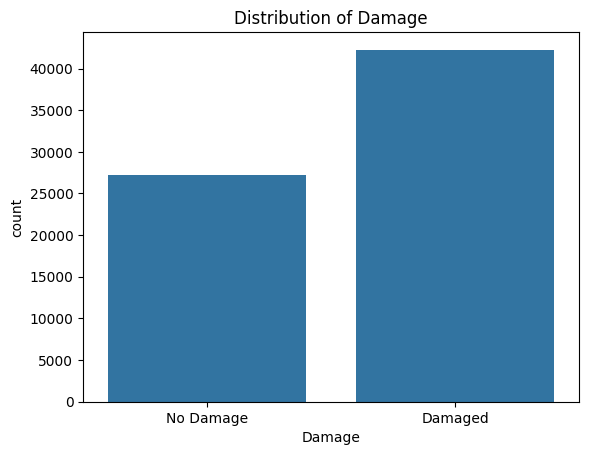

In [ ]:
sns.countplot(data=df3, x='Damage')
plt.title('Distribution of Damage')
plt.show()

In [ ]:
# Categorical columns
categorical_columns = df3.select_dtypes(include=['object']).columns
categorical_columns

Index(['Damage', 'City', ' CAL FIRE Unit', 'County', 'Incident Name',
       'Incident Number (e.g. CAAEU 123456)', 'Incident Start Date',
       'Structure Category', 'Roof Construction', 'Eaves', ' Vent Screen',
       'Exterior Siding', 'Window Pane', 'Fence Attached to Structure',
       'Site Address (parcel)'],
      dtype='object')

In [ ]:
# Drop irrelevent columns
irreleven_columns = ['Incident Number (e.g. CAAEU 123456)', 'Site Address (parcel)']
df3 = df3.drop(irreleven_columns, axis=1)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69413 entries, 0 to 100229
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Damage                       69413 non-null  object 
 1   City                         69413 non-null  object 
 2    CAL FIRE Unit               69413 non-null  object 
 3   County                       69413 non-null  object 
 4   Incident Name                69413 non-null  object 
 5   Incident Start Date          69413 non-null  object 
 6   Structure Category           69413 non-null  object 
 7   Roof Construction            69413 non-null  object 
 8   Eaves                        69413 non-null  object 
 9    Vent Screen                 69413 non-null  object 
 10  Exterior Siding              69413 non-null  object 
 11  Window Pane                  69413 non-null  object 
 12  Fence Attached to Structure  69413 non-null  object 
 13  Year Built (parcel) 

## Encoding

In [ ]:
# Unique values in categorical column
df3.select_dtypes(include=['object']).columns
categorical_columns = df3.columns[df3.nunique()<10]
for col in categorical_columns:
  print(col, df3[col].unique())

Damage ['No Damage' 'Damaged']
Structure Category ['Single Residence' 'Other Minor Structure' 'Multiple Residence'
 'Nonresidential Commercial' 'Mixed Commercial/Residential'
 'Infrastructure' 'Agriculture']
Eaves ['Unenclosed' 'Enclosed' 'Unknown' 'No Eaves' 'Not Applicable']
 Vent Screen ['Mesh Screen <= 1/8""' 'Mesh Screen > 1/8""' 'Unscreened' 'Unknown'
 'No Vents' 'Screened' '>30' '21-30' 'Deck Elevated']
Window Pane ['Single Pane' 'Multi Pane' 'Unknown' 'No Windows' 'Radiant Heat']
Fence Attached to Structure ['No Fence' 'Combustible' 'Unknown' 'Non Combustible']


In [ ]:
df3.head()

,Damage,City,CAL FIRE Unit,County,Incident Name,Incident Start Date,Structure Category,Roof Construction,Eaves,Vent Screen,Exterior Siding,Window Pane,Fence Attached to Structure,Year Built (parcel),Latitude,Longitude,x,y
0,No Damage,Winters,LNU,Solano,Quail,06-06-2020,Single Residence,Asphalt,Unenclosed,"Mesh Screen <= 1/8""""",Wood,Single Pane,No Fence,7.599902,38.474960,-122.044465,-13585927.70,4646740.750
1,Damaged,Winters,LNU,Solano,Quail,06-06-2020 00:00,Single Residence,Asphalt,Unenclosed,"Mesh Screen <= 1/8""""",Wood,Multi Pane,Combustible,7.591357,38.477442,-122.043252,-13585792.71,4647093.599
2,No Damage,Winters,LNU,Solano,Quail,06-06-2020 00:00,Single Residence,Asphalt,Enclosed,"Mesh Screen > 1/8""""",Wood,Single Pane,No Fence,7.603399,38.479357,-122.044585,-13585941.01,4647366.034
3,No Damage,Winters,LNU,Solano,Quail,06-06-2020 00:00,Single Residence,Asphalt,Unenclosed,"Mesh Screen > 1/8""""",Wood,Single Pane,No Fence,7.591862,38.487313,-122.015115,-13582660.52,4648497.399
4,No Damage,Winters,LNU,Solano,Quail,06-06-2020 00:00,Single Residence,Tile,Enclosed,"Mesh Screen > 1/8""""",Wood,Multi Pane,No Fence,7.591357,38.485636,-122.016122,-13582772.60,4648258.826


In [ ]:
# Encoding categorical columns to numeric values
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
df3['County'] = Le.fit_transform(df3['County'])
df3['City'] = Le.fit_transform(df3['City'])
df3[' CAL FIRE Unit'] = Le.fit_transform(df3[' CAL FIRE Unit'])
df3['Incident Name'] = Le.fit_transform(df3['Incident Name'])
df3['Structure Category'] = Le.fit_transform(df3['Structure Category'])
df3['Roof Construction'] = Le.fit_transform(df3['Roof Construction'])
df3['Eaves'] = Le.fit_transform(df3['Eaves'])
df3['Exterior Siding'] = Le.fit_transform(df3['Exterior Siding'])
df3[' Vent Screen'] = Le.fit_transform(df3[' Vent Screen'])
df3['Window Pane'] = Le.fit_transform(df3['Window Pane'])
df3['Fence Attached to Structure'] = Le.fit_transform(df3['Fence Attached to Structure'])
df3

,Damage,City,CAL FIRE Unit,County,Incident Name,Incident Start Date,Structure Category,Roof Construction,Eaves,Vent Screen,Exterior Siding,Window Pane,Fence Attached to Structure,Year Built (parcel),Latitude,Longitude,x,y
0,No Damage,282,10,36,144,06-06-2020,6,0,3,3,9,3,1,7.599902,38.474960,-122.044465,-13585927.70,4646740.750
1,Damaged,282,10,36,144,06-06-2020 00:00,6,0,3,3,9,0,0,7.591357,38.477442,-122.043252,-13585792.71,4647093.599
2,No Damage,282,10,36,144,06-06-2020 00:00,6,0,0,4,9,3,1,7.603399,38.479357,-122.044585,-13585941.01,4647366.034
3,No Damage,282,10,36,144,06-06-2020 00:00,6,0,3,4,9,3,1,7.591862,38.487313,-122.015115,-13582660.52,4648497.399
4,No Damage,282,10,36,144,06-06-2020 00:00,6,7,0,4,9,0,1,7.591357,38.485636,-122.016122,-13582772.60,4648258.826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100209,No Damage,144,8,14,70,12-09-2024 00:00,6,6,0,4,9,0,0,7.590852,34.031387,-118.700442,-13213672.76,4033017.332
100210,No Damage,144,8,14,70,12-09-2024 00:00,6,8,3,7,9,3,0,7.587817,34.031292,-118.700548,-13213684.61,4033004.614
100213,No Damage,144,8,14,70,12-09-2024 00:00,6,0,3,5,9,3,0,7.580189,34.032150,-118.699999,-13213623.39,4033119.801
100228,No Damage,144,8,14,70,12-09-2024 00:00,6,8,0,7,8,0,0,7.609367,34.032085,-118.698270,-13213431.00,4033111.003


In [ ]:
# Encode Timestamp [Incident Start Date] column
df3['Incident Start Date'] = pd.to_datetime(df3['Incident Start Date'], errors='coerce', infer_datetime_format=True)
df3['Incident Start Date'] = df3['Incident Start Date'].astype(int) / 10**9
df3

<ipython-input-54-dd226fa27d5b>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df3['Incident Start Date'] = pd.to_datetime(df3['Incident Start Date'], errors='coerce', infer_datetime_format=True)


,Damage,City,CAL FIRE Unit,County,Incident Name,Incident Start Date,Structure Category,Roof Construction,Eaves,Vent Screen,Exterior Siding,Window Pane,Fence Attached to Structure,Year Built (parcel),Latitude,Longitude,x,y
0,No Damage,282,10,36,144,1.591402e+09,6,0,3,3,9,3,1,7.599902,38.474960,-122.044465,-13585927.70,4646740.750
1,Damaged,282,10,36,144,-9.223372e+09,6,0,3,3,9,0,0,7.591357,38.477442,-122.043252,-13585792.71,4647093.599
2,No Damage,282,10,36,144,-9.223372e+09,6,0,0,4,9,3,1,7.603399,38.479357,-122.044585,-13585941.01,4647366.034
3,No Damage,282,10,36,144,-9.223372e+09,6,0,3,4,9,3,1,7.591862,38.487313,-122.015115,-13582660.52,4648497.399
4,No Damage,282,10,36,144,-9.223372e+09,6,7,0,4,9,0,1,7.591357,38.485636,-122.016122,-13582772.60,4648258.826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100209,No Damage,144,8,14,70,-9.223372e+09,6,6,0,4,9,0,0,7.590852,34.031387,-118.700442,-13213672.76,4033017.332
100210,No Damage,144,8,14,70,-9.223372e+09,6,8,3,7,9,3,0,7.587817,34.031292,-118.700548,-13213684.61,4033004.614
100213,No Damage,144,8,14,70,-9.223372e+09,6,0,3,5,9,3,0,7.580189,34.032150,-118.699999,-13213623.39,4033119.801
100228,No Damage,144,8,14,70,-9.223372e+09,6,8,0,7,8,0,0,7.609367,34.032085,-118.698270,-13213431.00,4033111.003


In [ ]:
# Encode Target Variable[Damage]
df3['Damage'] = df3['Damage'].replace(['No Damage'], 0)
df3['Damage'] = df3['Damage'].replace(['Damaged'], 1)
df3

<ipython-input-55-d7f22ad12eab>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3['Damage'] = df3['Damage'].replace(['Damaged'], 1)


,Damage,City,CAL FIRE Unit,County,Incident Name,Incident Start Date,Structure Category,Roof Construction,Eaves,Vent Screen,Exterior Siding,Window Pane,Fence Attached to Structure,Year Built (parcel),Latitude,Longitude,x,y
0,0,282,10,36,144,1.591402e+09,6,0,3,3,9,3,1,7.599902,38.474960,-122.044465,-13585927.70,4646740.750
1,1,282,10,36,144,-9.223372e+09,6,0,3,3,9,0,0,7.591357,38.477442,-122.043252,-13585792.71,4647093.599
2,0,282,10,36,144,-9.223372e+09,6,0,0,4,9,3,1,7.603399,38.479357,-122.044585,-13585941.01,4647366.034
3,0,282,10,36,144,-9.223372e+09,6,0,3,4,9,3,1,7.591862,38.487313,-122.015115,-13582660.52,4648497.399
4,0,282,10,36,144,-9.223372e+09,6,7,0,4,9,0,1,7.591357,38.485636,-122.016122,-13582772.60,4648258.826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100209,0,144,8,14,70,-9.223372e+09,6,6,0,4,9,0,0,7.590852,34.031387,-118.700442,-13213672.76,4033017.332
100210,0,144,8,14,70,-9.223372e+09,6,8,3,7,9,3,0,7.587817,34.031292,-118.700548,-13213684.61,4033004.614
100213,0,144,8,14,70,-9.223372e+09,6,0,3,5,9,3,0,7.580189,34.032150,-118.699999,-13213623.39,4033119.801
100228,0,144,8,14,70,-9.223372e+09,6,8,0,7,8,0,0,7.609367,34.032085,-118.698270,-13213431.00,4033111.003


In [73]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69413 entries, 0 to 100229
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Damage                       69413 non-null  int64  
 1   City                         69413 non-null  int64  
 2    CAL FIRE Unit               69413 non-null  int64  
 3   County                       69413 non-null  int64  
 4   Incident Name                69413 non-null  int64  
 5   Incident Start Date          69413 non-null  float64
 6   Structure Category           69413 non-null  int64  
 7   Roof Construction            69413 non-null  int64  
 8   Eaves                        69413 non-null  int64  
 9    Vent Screen                 69413 non-null  int64  
 10  Exterior Siding              69413 non-null  int64  
 11  Window Pane                  69413 non-null  int64  
 12  Fence Attached to Structure  69413 non-null  int64  
 13  Year Built (parcel) 

## Feature Selection

In [74]:
# Feature selection and Target variable
X = df3.drop('Damage', axis=1)
y = df3['Damage']

**Observation**

City & County – The location of an incident can influence damage severity due to factors like infrastructure quality, emergency response availability, and historical fire patterns.

CAL FIRE Unit – Different fire response units may have varying levels of resources and effectiveness, which can affect the extent of damage.

Incident Start Date – Identifying patterns from past incidents and their timing helps in assessing seasonal and environmental factors affecting damage.

Structure Category – The type of structure (single residence, commercial, agriculture, etc.) plays a crucial role in how much damage a fire can cause.

Roof Construction & Eaves – Roofing material and eaves' enclosure status affect fire resistance and spread.

Vent Screen & Exterior Siding – Structural vulnerabilities, such as the presence of vent screens or fire-resistant siding, can determine a building’s susceptibility to damage.

Window Pane & Fence Attached to Structure – Window type (single vs. multi-pane) and fence material (combustible vs. non-combustible) can influence fire spread and intensity.

Year Built (Parcel) – Older buildings may have outdated fire safety measures, making them more prone to severe damage.

Latitude & Longitude (x, y Coordinates) – Geographic location helps in understanding environmental risk factors such as vegetation density, wind patterns, and proximity to fire-prone areas.

## Feature Scaling

In [75]:
df3

,Damage,City,CAL FIRE Unit,County,Incident Name,Incident Start Date,Structure Category,Roof Construction,Eaves,Vent Screen,Exterior Siding,Window Pane,Fence Attached to Structure,Year Built (parcel),Latitude,Longitude,x,y
0,0,282,10,36,144,263.461572,6,0,3,3,9,3,1,1.008148,0.071119,-0.500165,-0.500165,0.058341
1,1,282,10,36,144,-0.003796,6,0,3,3,9,0,0,0.302959,0.072324,-0.499349,-0.499349,0.059566
2,0,282,10,36,144,-0.003796,6,0,0,4,9,3,1,1.296777,0.073255,-0.500246,-0.500246,0.060513
3,0,282,10,36,144,-0.003796,6,0,3,4,9,3,1,0.344608,0.077119,-0.480411,-0.480411,0.064442
4,0,282,10,36,144,-0.003796,6,7,0,4,9,0,1,0.302959,0.076304,-0.481089,-0.481089,0.063613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100209,0,144,8,14,70,-0.003796,6,6,0,4,9,0,0,0.261289,-2.086977,1.750556,1.750556,-2.073061
100210,0,144,8,14,70,-0.003796,6,8,3,7,9,3,0,0.010827,-2.087023,1.750484,1.750484,-2.073105
100213,0,144,8,14,70,-0.003796,6,0,3,5,9,3,0,-0.618674,-2.086606,1.750854,1.750854,-2.072705
100228,0,144,8,14,70,-0.003796,6,8,0,7,8,0,0,1.789233,-2.086638,1.752017,1.752017,-2.072735


In [76]:
# Feature scaling for features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df3[['Year Built (parcel)', 'Latitude', 'Longitude','x', 'y', 'Incident Start Date']] = scaler.fit_transform(df3[['Year Built (parcel)', 'Latitude', 'Longitude','x', 'y', 'Incident Start Date']])
df3

,Damage,City,CAL FIRE Unit,County,Incident Name,Incident Start Date,Structure Category,Roof Construction,Eaves,Vent Screen,Exterior Siding,Window Pane,Fence Attached to Structure,Year Built (parcel),Latitude,Longitude,x,y
0,0,282,10,36,144,263.461572,6,0,3,3,9,3,1,1.008148,0.071119,-0.500165,-0.500165,0.058341
1,1,282,10,36,144,-0.003796,6,0,3,3,9,0,0,0.302959,0.072324,-0.499349,-0.499349,0.059566
2,0,282,10,36,144,-0.003796,6,0,0,4,9,3,1,1.296777,0.073255,-0.500246,-0.500246,0.060513
3,0,282,10,36,144,-0.003796,6,0,3,4,9,3,1,0.344608,0.077119,-0.480411,-0.480411,0.064442
4,0,282,10,36,144,-0.003796,6,7,0,4,9,0,1,0.302959,0.076304,-0.481089,-0.481089,0.063613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100209,0,144,8,14,70,-0.003796,6,6,0,4,9,0,0,0.261289,-2.086977,1.750556,1.750556,-2.073061
100210,0,144,8,14,70,-0.003796,6,8,3,7,9,3,0,0.010827,-2.087023,1.750484,1.750484,-2.073105
100213,0,144,8,14,70,-0.003796,6,0,3,5,9,3,0,-0.618674,-2.086606,1.750854,1.750854,-2.072705
100228,0,144,8,14,70,-0.003796,6,8,0,7,8,0,0,1.789233,-2.086638,1.752017,1.752017,-2.072735


# Model Training and Testing

In [77]:
# Split data for Training and Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
y_train.value_counts()

,count
Damage,
1,33775
0,21755


## Training Multiple models

In [79]:
# Importing all the necessary packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

## Logistic Regression

In [100]:
# Logistic Reggression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Logistic Regression Classification Report:", classification_report(y_test, lr_pred))
print("Logistic Regression Confusion Matrix:", confusion_matrix(y_test, lr_pred))
lr_pred_prob = lr_model.predict_proba(X_test)[:,1]

Logistic Regression Accuracy: 0.8333213282431751
Logistic Regression Classification Report:               precision    recall  f1-score   support

           0       0.76      0.84      0.80      5403
           1       0.89      0.83      0.86      8480

    accuracy                           0.83     13883
   macro avg       0.82      0.83      0.83     13883
weighted avg       0.84      0.83      0.83     13883

Logistic Regression Confusion Matrix: [[4521  882]
 [1432 7048]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Decision Tree

In [101]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Decision Tree Classification Report:", classification_report(y_test, dt_pred))
print("Decision Tree Confusion Matrix:", confusion_matrix(y_test, dt_pred))
dt_pred_prob = dt_model.predict_proba(X_test)[:,1]

Decision Tree Accuracy: 0.9416552618310163
Decision Tree Classification Report:               precision    recall  f1-score   support

           0       0.92      0.93      0.93      5403
           1       0.95      0.95      0.95      8480

    accuracy                           0.94     13883
   macro avg       0.94      0.94      0.94     13883
weighted avg       0.94      0.94      0.94     13883

Decision Tree Confusion Matrix: [[4999  404]
 [ 406 8074]]


## Random Forest

In [102]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Classification Report:", classification_report(y_test, rf_pred))
print("Random Forest Confusion Matrix:", confusion_matrix(y_test, rf_pred))
rf_pred_prob = rf_model.predict_proba(X_test)[:,1]

Random Forest Accuracy: 0.9609594468054455
Random Forest Classification Report:               precision    recall  f1-score   support

           0       0.94      0.96      0.95      5403
           1       0.98      0.96      0.97      8480

    accuracy                           0.96     13883
   macro avg       0.96      0.96      0.96     13883
weighted avg       0.96      0.96      0.96     13883

Random Forest Confusion Matrix: [[5201  202]
 [ 340 8140]]


## Support Vector Machine

In [103]:
# SVM Model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("SVM Classification Report:", classification_report(y_test, svm_pred))
print("SVM Confusion Matrix:", confusion_matrix(y_test, svm_pred))
svm_pred_prob = svm_model.predict_proba(X_test)[:,1]

SVM Accuracy: 0.8406684434200101
SVM Classification Report:               precision    recall  f1-score   support

           0       0.76      0.87      0.81      5403
           1       0.91      0.82      0.86      8480

    accuracy                           0.84     13883
   macro avg       0.83      0.85      0.84     13883
weighted avg       0.85      0.84      0.84     13883

SVM Confusion Matrix: [[4697  706]
 [1506 6974]]


## KNNeighbour

In [104]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("KNN Classification Report:", classification_report(y_test, knn_pred))
print("KNN Confusion Matrix:", confusion_matrix(y_test, knn_pred))
knn_pred_prob = knn_model.predict_proba(X_test)[:,1]

KNN Accuracy: 0.9368292155874091
KNN Classification Report:               precision    recall  f1-score   support

           0       0.91      0.93      0.92      5403
           1       0.95      0.94      0.95      8480

    accuracy                           0.94     13883
   macro avg       0.93      0.94      0.93     13883
weighted avg       0.94      0.94      0.94     13883

KNN Confusion Matrix: [[5025  378]
 [ 499 7981]]


## Gradient Boosting

In [105]:
# Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print("Gradient Boosting Classification Report:", classification_report(y_test, gb_pred))
print("Gradient Boosting Confusion Matrix:", confusion_matrix(y_test, gb_pred))
gb_pred_prob = gb_model.predict_proba(X_test)[:,1]

Gradient Boosting Accuracy: 0.9312828639343081
Gradient Boosting Classification Report:               precision    recall  f1-score   support

           0       0.89      0.94      0.91      5403
           1       0.96      0.93      0.94      8480

    accuracy                           0.93     13883
   macro avg       0.93      0.93      0.93     13883
weighted avg       0.93      0.93      0.93     13883

Gradient Boosting Confusion Matrix: [[5079  324]
 [ 630 7850]]


# Model Performance

## Comparing Model scores

In [110]:
# Comparing each model with  Accuracy scores
model_accuracy_score = {
    'Logistic Regression': accuracy_score(y_test, lr_pred),
    'Decision Tree': accuracy_score(y_test, dt_pred),
    'Random Forest': accuracy_score(y_test, rf_pred),
    'SVC': accuracy_score(y_test, svm_pred),
    'KNN': accuracy_score(y_test, knn_pred),
    'Gradient Boosting': accuracy_score(y_test, gb_pred)
}

Accuracy_Scores = pd.DataFrame(list(model_accuracy_score.items()), columns=['Model', 'Accuracy Score'])
Accuracy_Scores = Accuracy_Scores.sort_values(by='Accuracy Score', ascending=False)
print(Accuracy_Scores)


                 Model  Accuracy Score
2        Random Forest        0.960959
1        Decision Tree        0.941655
4                  KNN        0.936829
5    Gradient Boosting        0.931283
3                  SVC        0.840668
0  Logistic Regression        0.833321


In [111]:
# Comparing each model with F1 score
model_f1_score = {
    'Logistic Regression': f1_score(y_test, lr_pred),
    'Decision Tree': f1_score(y_test, dt_pred),
    'Random Forest': f1_score(y_test, rf_pred),
    'SVC': f1_score(y_test, svm_pred),
    'KNN': f1_score(y_test, knn_pred),
    'Gradient Boosting': f1_score(y_test, gb_pred)
}

F1_Scores = pd.DataFrame(list(model_f1_score.items()), columns=['Model', 'F1 Score'])
F1_Scores = F1_Scores.sort_values(by='F1 Score', ascending=False)
print(F1_Scores)


                 Model  F1 Score
2        Random Forest  0.967780
1        Decision Tree  0.952235
4                  KNN  0.947919
5    Gradient Boosting  0.942716
3                  SVC  0.863119
0  Logistic Regression  0.858988


## Visualization of Model Performance

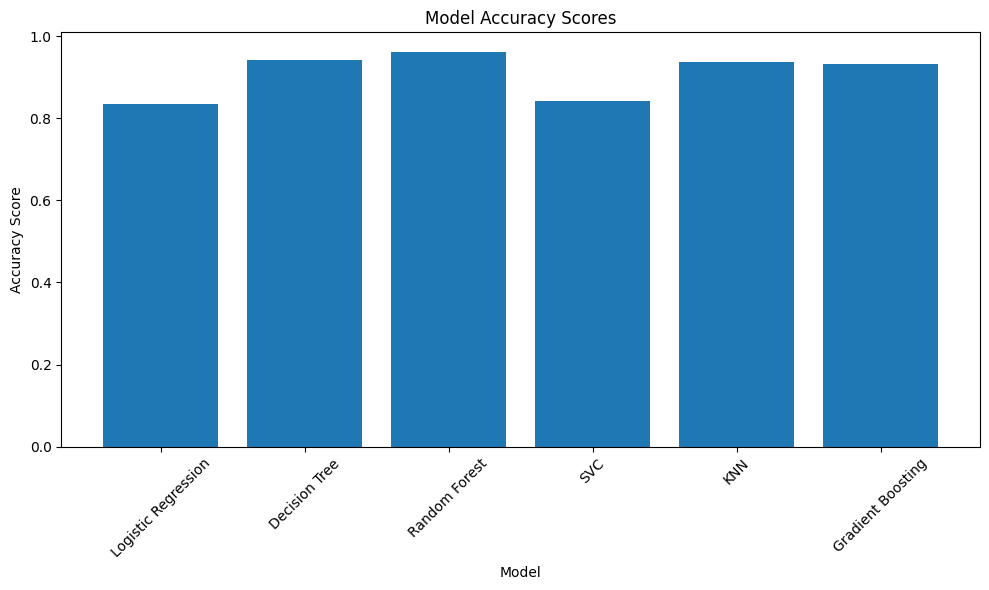

In [108]:
# Visualization shows the Model Performance based on Accuracy score
plt.figure(figsize=(10, 6))
plt.bar(model_accuracy_score.keys(), model_accuracy_score.values())
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Scores')
plt.xticks(rotation=45)
plt.tight_layout()

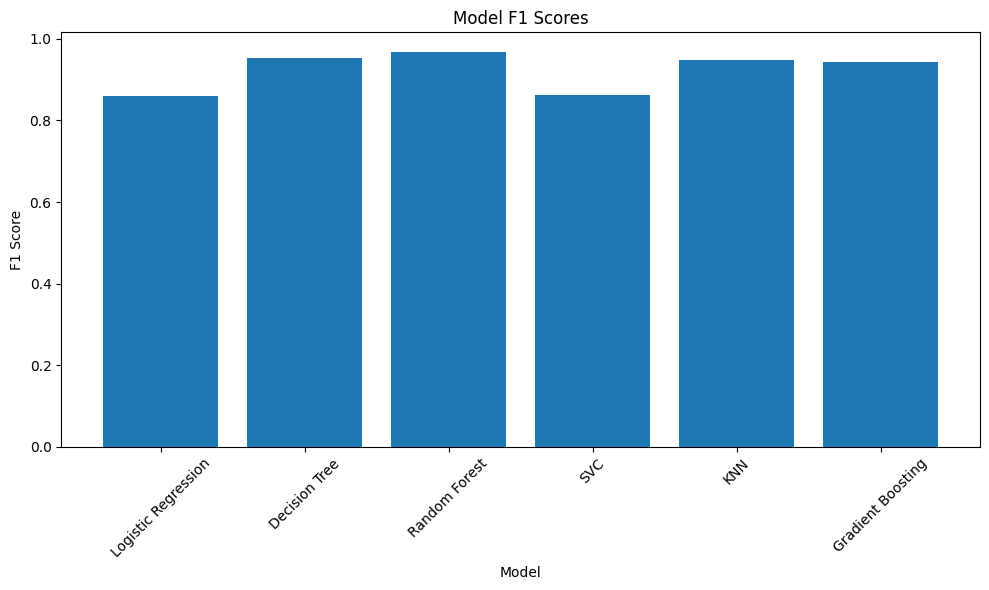

In [109]:
# Visualization shows the Model Performance based on F1-score
plt.figure(figsize=(10, 6))
plt.bar(model_f1_score.keys(), model_f1_score.values())
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('Model F1 Scores')
plt.xticks(rotation=45)
plt.tight_layout()

**Model Comparison Result**

*Accuracy Score (Performance on Entire Dataset)*

**Random Forest** (96.09%) performed the best in terms of accuracy, meaning it correctly predicted most of the test set.

*F1 Score (Performance on Individual Classes)*

**Random Forest** has the highest F1 score (96.77%), meaning it performs well across both precision and recall.
Decision Tree and KNN also have high F1 scores (95.22% and 94.79%), meaning they handle class imbalances well.

# Conclusion

**Random Forest** is the best-performing model overall in both accuracy and F1 score.

Decision Tree and KNN also perform well but may be prone to overfitting compared to Random Forest.

Gradient Boosting performs slightly worse than Random Forest but is still a strong model.

SVC and Logistic Regression are the weakest models for this dataset.

****
